# Unsupervised Learning - Assignment

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

In [2]:
X, y = load_linnerud(return_X_y=True)
X.shape
y.shape

(20, 3)

In [3]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[0.25      , 0.55721393, 0.15555556],
       [0.0625    , 0.29850746, 0.15555556],
       [0.6875    , 0.25373134, 0.33777778],
       [0.6875    , 0.27363184, 0.05333333],
       [0.75      , 0.52238806, 0.14666667],
       [0.1875    , 0.25373134, 0.07555556],
       [0.4375    , 0.25373134, 0.05777778],
       [0.3125    , 0.37313433, 0.06666667],
       [0.875     , 0.74626866, 0.06666667],
       [1.        , 1.        , 1.        ],
       [1.        , 0.34825871, 0.05777778],
       [0.75      , 0.7960199 , 0.4       ],
       [0.8125    , 0.82089552, 0.35555556],
       [0.        , 0.        , 0.11111111],
       [0.3125    , 0.09950249, 0.02666667],
       [0.6875    , 0.7960199 , 0.42222222],
       [0.1875    , 0.04975124, 0.        ],
       [0.625     , 0.89552239, 0.24444444],
       [0.875     , 0.87064677, 0.21333333],
       [0.0625    , 0.29850746, 0.08      ]])

[Text(0.5, 1.0, 'after scaling')]

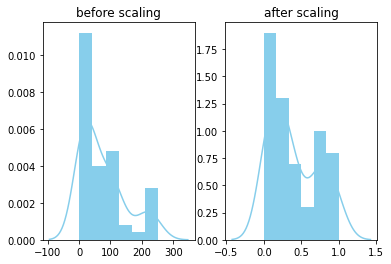

In [4]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(X, bins=6, color='skyblue', hist_kws={"linewidth": 15,'alpha':1}, ax=axs[0]).set(title='before scaling')
sns.distplot(X_scaled, bins=6, color='skyblue', hist_kws={"linewidth": 15,'alpha':1}, ax=axs[1]).set(title='after scaling')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((15, 3), (5, 3), (15, 3), (5, 3))

In [6]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[0.1875    , 0.25373134, 0.07555556],
       [0.75      , 0.7960199 , 0.4       ],
       [0.6875    , 0.27363184, 0.05333333],
       [0.875     , 0.87064677, 0.21333333],
       [0.1875    , 0.04975124, 0.        ],
       [0.        , 0.        , 0.11111111],
       [0.6875    , 0.25373134, 0.33777778],
       [1.        , 1.        , 1.        ],
       [0.0625    , 0.29850746, 0.08      ],
       [0.75      , 0.52238806, 0.14666667],
       [0.8125    , 0.82089552, 0.35555556],
       [0.3125    , 0.37313433, 0.06666667],
       [1.        , 0.34825871, 0.05777778],
       [0.3125    , 0.09950249, 0.02666667],
       [0.4375    , 0.25373134, 0.05777778]])

[Text(0.5, 1.0, 'after scaling')]

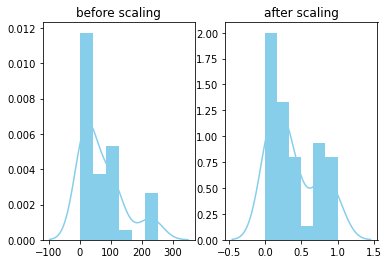

In [7]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(X_train, bins=6, color='skyblue', hist_kws={"linewidth": 15,'alpha':1}, ax=axs[0]).set(title='before scaling')
sns.distplot(X_train_scaled, bins=6, color='skyblue', hist_kws={"linewidth": 15,'alpha':1}, ax=axs[1]).set(title='after scaling')

Linnerud dataset has only 20 examples, 3 independent variables, and 3 targets. This is unlike most of the big datasets having many (hundreds to thousands) data points that we use for ML problems. Also, the distribution is not normal Gaussian-type.

    
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [9]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data_train = fetch_20newsgroups_vectorized(subset='train')
data_test  = fetch_20newsgroups_vectorized(subset='test')
#data = fetch_20newsgroups_vectorized(subset='train')
#X = data['data']
#y = data['target']
#print(X.shape)

X = data_train.data
y = data_train.target
display(data_train.data.shape, 
        data_train.target.shape, 
        len(data_train.target_names))

(11314, 130107)

(11314,)

20

In [10]:
# At first, test a model with the data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print("KNN model score: {:.2f}".format(knn.score(X, y)))
#print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

KNN model score: 0.85


Text(0.5, 1.0, 'testing KNeighborsClassifier with different number of neighbors without kernelPCA')

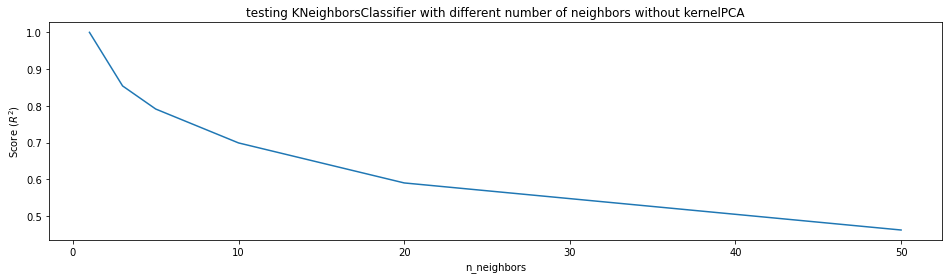

In [11]:
model_accuracy = []
# try n_neighbors from 1 to wherever
# neighbors_settings = list(range(1, 100)) # this takes time
neighbors_settings = [1, 3, 5, 10, 20, 50] # testing this to save time
for n in neighbors_settings:
# build the model
    knn = KNeighborsClassifier(n_neighbors=n).fit(X, y)
# record model score
    model_accuracy.append(knn.score(X, y))

plt.figure(figsize=(16,4))
plt.plot(neighbors_settings, model_accuracy)
plt.ylabel("Score ($R^2$)")
plt.xlabel("n_neighbors")
plt.title("testing KNeighborsClassifier with different number of neighbors without kernelPCA")

In [12]:
# Use KernelPCA for dimensionality reduction
pca = KernelPCA(n_components=20, kernel='linear').fit(X)
X_pca = pca.transform(X)
knn.fit(X_pca, y)
print("Model accuracy after kernelPCA: {:.2f}".format(knn.score(X_pca, y)))

Model accuracy after kernelPCA: 0.32


Text(0.5, 1.0, 'testing how model score changes with different number of components using kernelPCA')

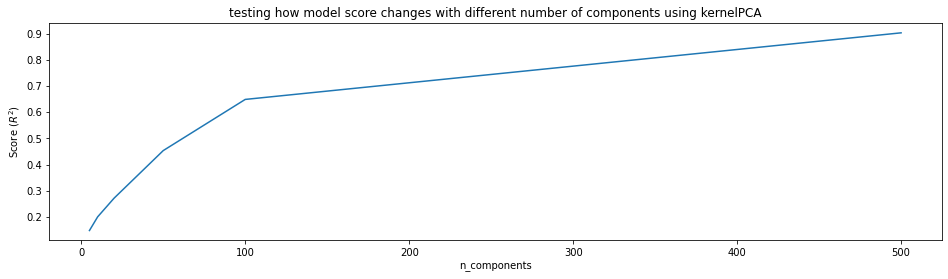

In [13]:
# By usinig KernelPCA, train a classifier at different nr of dimensions, check how model score changes with dimensions
kPCA_model_accuracy = []
components = [5, 10, 20, 50, 100, 500]
for n in components:
    transformer = KernelPCA(n_components=n, kernel='linear')
    X_transformed = transformer.fit_transform(X)
    svc = LinearSVC().fit(X_transformed, y)
    kPCA_model_accuracy.append(svc.score(X_transformed, y))

plt.figure(figsize=(16,4))
plt.plot(components, kPCA_model_accuracy)
plt.ylabel("Score ($R^2$)")
plt.xlabel("n_components")
plt.title("testing how model score changes with different number of components using kernelPCA")

# Therefore, model score improves significantly with incresing number of components

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

In [14]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train')
Y = data['target']

# some generated clusters
Clusters = Y.copy()
Clusters[:3000] = 3

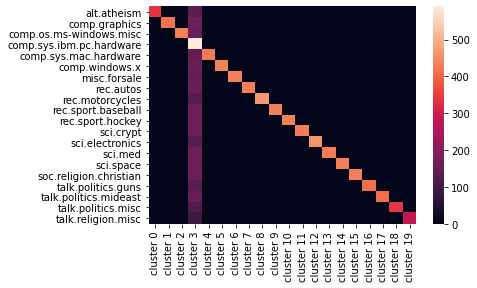

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y, Clusters)
sns.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

# Your code from here
20 News Groups dataset

In [16]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data_train = fetch_20newsgroups_vectorized(subset='train')
data_test  = fetch_20newsgroups_vectorized(subset='test')
#data = fetch_20newsgroups_vectorized(subset='train')
#X = data['data']
#y = data['target']
#print(X.shape)

X = data_train.data
y = data_train.target.reshape(-1, 1)
display(data_train.data.shape, 
        data_train.target.shape, 
        len(data_train.target_names))

(11314, 130107)

(11314,)

20

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix

labels = data_train.target
class_names = data_train.target_names
cluster_names = []
for i in range(20):
    cluster_names.append("cluster %d" % i)

In [18]:
svd = TruncatedSVD(n_components = 50)
normalizer = Normalizer(copy = False)
lsa = make_pipeline(svd, normalizer)
pipe = lsa.fit_transform(X)
print("Total samples done before normalization: %d, Total features done: %d" % pipe.shape)

normalizer = Normalizer(copy = True)
lsa = make_pipeline(svd, normalizer)
normalized_pipe = lsa.fit_transform(X)
print("Total samples done after normalization: %d, Total features done: %d" % normalized_pipe.shape)

Total samples done before normalization: 11314, Total features done: 50
Total samples done after normalization: 11314, Total features done: 50


In [19]:
# Clustering by KMeans
km = KMeans(n_clusters = 20, init = 'k-means++', max_iter=100, n_init=1, verbose = False)
km.fit(pipe)
cm = confusion_matrix(labels, km.labels_)
cm

array([[  0,  19,   4,  34,  17,  28,   6, 127,  10,  31,  18,  80,   8,
         40,   1,   2,   0,  22,  18,  15],
       [  0,  41,  17,  15,  55,  21,  27,  14,  35,  25,  38,  14,  58,
         24,  23,  53,  22,  33,  51,  18],
       [  7,  37,  15,  33,  86,  22,  22,  15,  61,  10,  41,  15,  63,
         21,  11,  33,  29,  31,  22,  17],
       [  0,  44,  21,  10,  54,  35,  23,  10,  91,  13,  67,  20,  48,
         28,  12,  28,  23,  20,  30,  13],
       [  0,  30,   8,  19,  32,  19,  29,  14, 101,  13,  68,  26,  40,
         16,  15,  17,  14,  68,  31,  18],
       [  0,  37,  29,  16,  22,  23,  17,  23,  71,  19, 106,  13,  73,
         15,  18,  34,  10,  22,  21,  24],
       [ 17,  49,  22,   8,  28,  15,  61,   6,  10,   8,  14,   5,  22,
         14, 165,   8,  86,  14,  26,   7],
       [  0,  43,  19,  17,  25,  49,  17,  18,  86,  19,  46,  67,  22,
         54,   5,   6,   9,  46,  25,  21],
       [  0,  37,  29,  33,  29,  71,  15,  14,  74,  23,  63,  

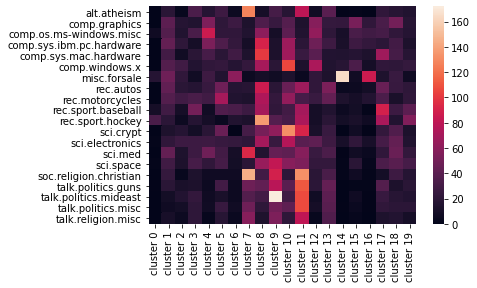

In [20]:
# Confusion matrix heatmap after LSA without normalization
sns.heatmap(cm, xticklabels=cluster_names, yticklabels=class_names)

In [21]:
# Print true class vs cluster labels
print(labels, km.labels_)

[17  7 10 ... 14 12 11] [ 9  9 11 ... 16 16 10]


In [22]:
# Now let's repeat the same thing with normalization
km.fit(normalized_pipe)
cm_n = confusion_matrix(labels, km.labels_)
cm_n

array([[ 33,  17,   1,   0,  16,  10,  12,  16,  10,  34,  17,  23,  18,
          4,  31,  51, 134,  13,  39,   1],
       [ 16,  49,  40,   7,  35,  25,  20,  12,  32,  27,  36,  17,  51,
         25,  21,  23,  13,  57,  22,  56],
       [  9,  75,  43,  11,  59,  32,  27,  21,  23,  21,  29,  19,  19,
         18,  29,  10,  17,  61,  22,  46],
       [  9,  43,  32,  16, 123,  31,  39,  10,  16,  18,  32,  29,  27,
         28,  17,   9,   9,  49,  28,  25],
       [ 23,  20,  32,   7, 105,  34,  60,  11,  27,  30,  26,  19,  28,
         12,  43,  10,  12,  43,  17,  19],
       [  7,  20,  32,   2,  69,  32,  48,  15,  17,  51,  35,  28,  21,
         34,  22,  12,  19,  79,  16,  34],
       [  2,  26,  28, 165,   9,  36,   6,   9,  95,  10,  59,  14,  25,
         30,  13,   7,   7,  21,  14,   9],
       [ 45,  20,  12,   3,  49,  17,  69,  15,  19,  56,  35,  47,  26,
         19,  35,  23,  22,  21,  52,   9],
       [ 42,  25,  13,   5,  31,  26,  62,  26,  15,  58,  41,  

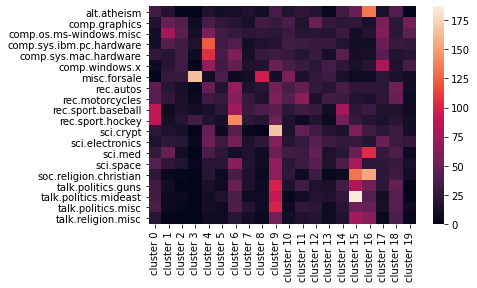

In [23]:
# Confusion matrix heatmap after LSA with normalization
sns.heatmap(cm_n, xticklabels=cluster_names, yticklabels=class_names)

# Based on the heatmap, the clustering efficiency is not very satisfactory